<a href="https://colab.research.google.com/github/mouryag/FaceEmotionRecog-Flask/blob/main/EmotionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import numpy as np 
import pandas as pd 
import cv2

In [3]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('drive/My Drive/fer2013.csv')

In [5]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise','Neutral']
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [10]:
df.emotion.describe()

count    35887.000000
mean         3.323265
std          1.873819
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: emotion, dtype: float64

In [11]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [8]:
import matplotlib.pyplot as plt

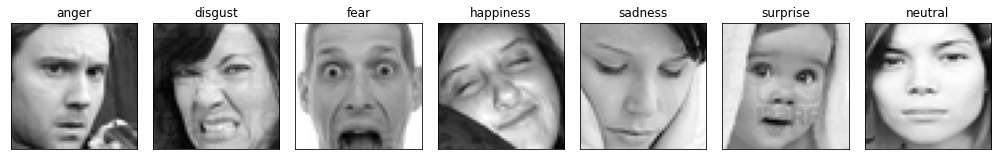

In [9]:
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(1):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px , cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [12]:
X = []
y = []

In [13]:
len(df)

35887

In [14]:
def getData(path):
    anger = 0
    disgust=0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)   
    
    for i in range(len(df)):
          if df.iloc[i]['emotion'] == 0:
              if anger <= 4000:            
                  y.append(df.iloc[i]['emotion'])
                  im = df.iloc[i]['pixels']
                  im = [int(x) for x in im.split()]
                  X.append(im)
                  #print("anger: ",anger)
                  anger += 1
              else:
                  pass
          if df.iloc[i]['emotion'] == 1:
              if disgust <= 550:            
                  y.append(df.iloc[i]['emotion'])
                  im = df.iloc[i]['pixels']
                  im = [int(x) for x in im.split()]
                  X.append(im)
                  disgust += 1
              else:
                  pass
          if df.iloc[i]['emotion'] == 2:
              if fear <= 4000:            
                  y.append(df.iloc[i]['emotion'])
                  im = df.iloc[i]['pixels']
                  im = [int(x) for x in im.split()]
                  X.append(im)
                  fear += 1
              else:
                  pass
          if df.iloc[i]['emotion'] == 3:
              if happy <= 4000:            
                  y.append(df.iloc[i]['emotion'])
                  im = df.iloc[i]['pixels']
                  im = [int(x) for x in im.split()]
                  X.append(im)
                  happy += 1
              else:
                  pass
              
          if df.iloc[i]['emotion'] == 4:
              if sad <= 4000:            
                  y.append(df.iloc[i]['emotion'])
                  im = df.iloc[i]['pixels']
                  im = [int(x) for x in im.split()]
                  X.append(im)
                  sad += 1
              else:
                  pass
              
          if df.iloc[i]['emotion'] == 5:
              if surprise <= 4000:            
                  y.append(df.iloc[i]['emotion'])
                  im = df.iloc[i]['pixels']
                  im = [int(x) for x in im.split()]
                  X.append(im)
                  surprise += 1
              else:
                  pass
          if df.iloc[i]['emotion'] == 6:
              if neutral <= 4000:            
                  y.append(df.iloc[i]['emotion'])
                  im = df.iloc[i]['pixels']
                  im = [int(x) for x in im.split()]
                  X.append(im)
                  neutral += 1
              else:
                  pass

In [15]:
getData('drive/My Drive/fer2013.csv')

In [16]:
len(X)

24553

In [17]:
X = np.array(X)/255.0
y = np.array(y)

In [18]:
X.shape,y.shape

((24553, 2304), (24553,))

In [19]:
X[0]

array([0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
       0.32156863])

In [20]:
retX=np.empty((24553,48,48,3))

In [21]:
retX.shape

(24553, 48, 48, 3)

In [22]:
cnt=0
for im in X:
  ret = np.empty((48, 48, 3))  
  ret[:, :, 0] = im.reshape(48,48)
  ret[:, :, 1] = im.reshape(48,48)
  ret[:, :, 2] = im.reshape(48,48)
  retX[cnt]=ret
  cnt+=1

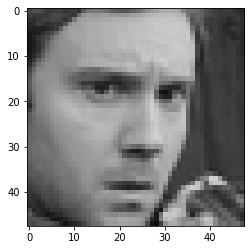

In [23]:
plt.imshow(retX[0])

In [24]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([4001,  547, 4001, 4001, 4001, 4001, 4001]))

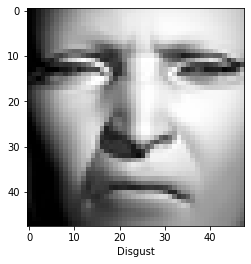

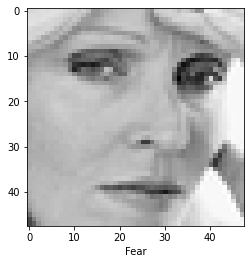

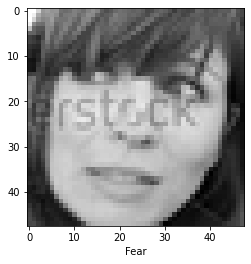

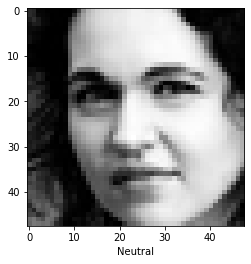

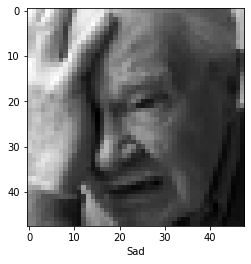

In [25]:
for i in range(5):
    r = np.random.randint(1, 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y[r]])

In [26]:
from tensorflow.keras.utils import to_categorical
y_new = to_categorical(y, num_classes=7)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [28]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [30]:
vgg =VGG16(input_shape=[48, 48, 3], include_top=False, weights='imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [31]:
x = Flatten()(vgg.output)
x = Dense(7, activation='sigmoid')(x)
model = Model(vgg.input, x)

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [40]:
model.fit(retX,y_new,epochs=2,batch_size=64)

Epoch 1/2
384/384 [==============================] - 48s 125ms/step - loss: 0.1740 - accuracy: 0.9427
Epoch 2/2
384/384 [==============================] - 48s 124ms/step - loss: 0.1600 - accuracy: 0.9483


In [41]:
model.save("facemo_model_weights.h5")

In [43]:
retX[2].shape

(48, 48, 3)

In [44]:
model.evaluate(retX[:200],y_new[:200])

7/7 [==============================] - 2s 86ms/step - loss: 0.1240 - accuracy: 0.9550


[0.12397077679634094, 0.9549999833106995]

In [54]:
model.predict(np.zeros((1,48,48,3)))

array([[0.94344646, 0.01948768, 0.12710741, 0.73716635, 0.7381192 ,
        0.57539487, 0.52080834]], dtype=float32)

In [51]:
np.zeros((10,10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [58]:
k = np.expand_dims(retX[0], 0) / 255.
p = model.predict(k)
indx = np.argmax(p)
print(label_map[indx])

Anger
